In [1]:
import h5py
import numpy as np
import os,random
from tensorflow.keras.layers import Input,Reshape,ZeroPadding2D,MaxPool2D,Conv1D,Conv2D,Dropout,Flatten,Dense,Activation,MaxPooling2D,AlphaDropout
from tensorflow.keras import layers
import tensorflow.keras.models as Model
from tensorflow.keras.regularizers import *
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import tensorflow_addons as tfa

In [2]:
f = h5py.File(r'C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part0.h5')
sample_num = f['X'].shape[0]
# idx = np.random.choice(range(0,sample_num),size=3375)
idx = np.random.choice(range(0,sample_num),size=60000)
X = f['X'][:][idx]
Y = f['Y'][:][idx]
Z = f['Z'][:][idx]
f.close()

for i in range(1,24):
    if i%1 == 0:
        !free -m
    '''if i == 10:
        continue'''
    filename = r'C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part'+str(i) + '.h5'
    print(filename)
    f = h5py.File(filename,'r')
    X = np.vstack((X,f['X'][:][idx]))
    Y = np.vstack((Y,f['Y'][:][idx]))
    Z = np.vstack((Z,f['Z'][:][idx]))
    f.close()


print('X-size：',X.shape)
print('Y-size：',Y.shape)
print('Z-size：',Z.shape)

C:\Users\hutom\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.
'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part1.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part2.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part3.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part4.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part5.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part6.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part7.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part8.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part9.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part10.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part11.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part12.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part13.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part14.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part15.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part16.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part17.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part18.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part19.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part20.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part21.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part22.h5


'free' is not recognized as an internal or external command,
operable program or batch file.


C:\Users\hutom\Downloads\Compressed\2018.01\ExtractDataset\part23.h5
X-size： (1440000, 1024, 2)
Y-size： (1440000, 24)
Z-size： (1440000, 1)


## Data preprocessing, and obtain training set and test set

In [3]:
n_examples = X.shape[0]
# n_train = int(n_examples * 0.9877) 
n_train = int(n_examples * 0.8)  
train_idx = np.random.choice(range(0,n_examples), size=n_train, replace=False)  #Randomly select training sample subscript
test_idx = list(set(range(0,n_examples))-set(train_idx)) #Test sample index


Z_train = Z[train_idx]
Z_train = Z_train.reshape((len(Z_train)))


train_idx_under=[] #trainidx for data with SNR <=0dB
train_idx_upper=[] #trainidx for data with SNR>0dB
for index, snr in enumerate(Z_train):
    if (snr<=0):
        train_idx_under.append(index)
    else:
        train_idx_upper.append(index)
random.shuffle(train_idx_under)
train_idx_under = np.array(train_idx_under)
random.shuffle(train_idx_under)
train_idx_upper = np.array(train_idx_upper)

X_train_under = X[train_idx_under]  #training samples
Y_train_under = Y[train_idx_under]

X_train_upper = X[train_idx_upper]  #training samples
Y_train_upper = Y[train_idx_upper]

X_test =  X[test_idx]  #testing samples
Y_test = Y[test_idx]
print("X_train_under:",X_train_under.shape)
print("Y_train_under:",Y_train_under.shape)

print("X_train_upper:",X_train_upper.shape)
print("Y_train_upper:",Y_train_upper.shape)


print("X_test:",X_test.shape)
print("Y_test:",Y_test.shape)

X_train_under: (487211, 1024, 2)
Y_train_under: (487211, 24)
X_train_upper: (664789, 1024, 2)
Y_train_upper: (664789, 24)
X_test: (288000, 1024, 2)
Y_test: (288000, 24)


In [6]:
classes = ['32PSK',
 '16APSK',
 '32QAM',
 'FM',
 'GMSK',
 '32APSK',
 'OQPSK',
 '8ASK',
 'BPSK',
 '8PSK',
 'AM-SSB-SC',
 '4ASK',
 '16PSK',
 '64APSK',
 '128QAM',
 '128APSK',
 'AM-DSB-SC',
 'AM-SSB-WC',
 '64QAM',
 'QPSK',
 '256QAM',
 'AM-DSB-WC',
 'OOK',
 '16QAM']

def residual_stack(X,Filters,Seq,max_pool):
    #1*1 Conv Linear
    X = Conv2D(Filters, (1, 1), padding='same', name=Seq+"_conv1", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    #Residual Unit 1
    X_shortcut = X
    X = Conv2D(Filters, (3, 2), padding='same',activation="relu",name=Seq+"_conv2", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    X = Conv2D(Filters, (3, 2), padding='same', name=Seq+"_conv3", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    X = layers.add([X,X_shortcut])
    X = Activation("relu")(X)
    #Residual Unit 2
    X_shortcut = X
    X = Conv2D(Filters, (3, 2), padding='same',activation="relu",name=Seq+"_conv4", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    X = Conv2D(Filters, (3, 2), padding='same', name=Seq+"_conv5", kernel_initializer='glorot_uniform',data_format="channels_first")(X)
    X = layers.add([X,X_shortcut])
    X = Activation("relu")(X)
    #MaxPooling
    if max_pool:
        X = MaxPooling2D(pool_size=(2, 1), strides=(2, 1), padding='valid', data_format="channels_first")(X)
    return X


in_shp = X_train_upper.shape[1:]   #Dimensions of each sample
#input layer
X_input = Input(in_shp)
X = Reshape([1,1024,2], input_shape=in_shp)(X_input)
#Residual Srack 1
X = residual_stack(X,32,"ReStk1",False)  #shape:(1,512,32)
X = MaxPooling2D(pool_size=(2, 2), strides=(2, 1), padding='valid', data_format="channels_first")(X)
#Residual Srack 2
X = residual_stack(X,32,"ReStk2",True)  #shape:(1,256,32)
#Residual Srack 3
X = residual_stack(X,32,"ReStk3",True)  #shape:(1,128,32)
#Residual Srack 4
X = residual_stack(X,32,"ReStk4",True)  #shape:(1,64,32)
#Residual Srack 5
X = residual_stack(X,32,"ReStk5",True)  #shape:(1,32,32)
#Residual Srack 6
X = residual_stack(X,32,"ReStk6",True)  #shape:(1,16,32)
#Full Con 1
X = Flatten()(X)
X = Dense(128, activation='selu', kernel_initializer='he_normal', name="dense1")(X)
X = AlphaDropout(0.3)(X)
#Full Con 2
X = Dense(128, activation='selu', kernel_initializer='he_normal', name="dense2")(X)
X = AlphaDropout(0.3)(X)
#Full Con 3
X = Dense(len(classes), kernel_initializer='he_normal', name="dense3")(X)
#SoftMax
X = Activation('softmax')(X)
#Create Model
model = Model.Model(inputs=X_input,outputs=X)
model.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1024, 2)]    0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 1024, 2)   0           input_2[0][0]                    
__________________________________________________________________________________________________
ReStk1_conv1 (Conv2D)           (None, 32, 1024, 2)  64          reshape_1[0][0]                  
__________________________________________________________________________________________________
ReStk1_conv2 (Conv2D)           (None, 32, 1024, 2)  6176        ReStk1_conv1[0][0]               
_______________________________________________________________________________________

In [5]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [8]:
filepath = 'resnet_model_under.h5'
history = model.fit(X_train_under,
    Y_train_under,
    batch_size=1024,
    epochs=100,
    verbose=1,
#     validation_data=(X_test, Y_test),
    validation_split = 0.2,
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    ])

Epoch 1/100
381/381 [==============================] - ETA: 0s - loss: 2.3686 - accuracy: 0.1935
Epoch 00001: val_loss improved from inf to 2.07485, saving model to resnet_model_under.h5
381/381 [==============================] - 126s 330ms/step - loss: 2.3686 - accuracy: 0.1935 - val_loss: 2.0749 - val_accuracy: 0.2477
Epoch 2/100
381/381 [==============================] - ETA: 0s - loss: 1.9845 - accuracy: 0.2752
Epoch 00002: val_loss improved from 2.07485 to 1.92390, saving model to resnet_model_under.h5
381/381 [==============================] - 127s 333ms/step - loss: 1.9845 - accuracy: 0.2752 - val_loss: 1.9239 - val_accuracy: 0.2923
Epoch 3/100
381/381 [==============================] - ETA: 0s - loss: 1.9024 - accuracy: 0.3054
Epoch 00003: val_loss improved from 1.92390 to 1.90534, saving model to resnet_model_under.h5
381/381 [==============================] - 128s 335ms/step - loss: 1.9024 - accuracy: 0.3054 - val_loss: 1.9053 - val_accuracy: 0.3087
Epoch 4/100
381/381 [=====

Epoch 27/100
381/381 [==============================] - ETA: 0s - loss: 1.3654 - accuracy: 0.5076
Epoch 00027: val_loss did not improve from 1.39982
381/381 [==============================] - 123s 324ms/step - loss: 1.3654 - accuracy: 0.5076 - val_loss: 1.4112 - val_accuracy: 0.5122
Epoch 28/100
381/381 [==============================] - ETA: 0s - loss: 1.3476 - accuracy: 0.5139
Epoch 00028: val_loss improved from 1.39982 to 1.38201, saving model to resnet_model_under.h5
381/381 [==============================] - 124s 326ms/step - loss: 1.3476 - accuracy: 0.5139 - val_loss: 1.3820 - val_accuracy: 0.5143
Epoch 29/100
381/381 [==============================] - ETA: 0s - loss: 1.3459 - accuracy: 0.5167
Epoch 00029: val_loss improved from 1.38201 to 1.37644, saving model to resnet_model_under.h5
381/381 [==============================] - 124s 326ms/step - loss: 1.3459 - accuracy: 0.5167 - val_loss: 1.3764 - val_accuracy: 0.5187
Epoch 30/100
381/381 [==============================] - ETA: 0

381/381 [==============================] - ETA: 0s - loss: 1.2342 - accuracy: 0.5682
Epoch 00054: val_loss did not improve from 1.26987
381/381 [==============================] - 123s 324ms/step - loss: 1.2342 - accuracy: 0.5682 - val_loss: 1.3064 - val_accuracy: 0.5538
Epoch 55/100
381/381 [==============================] - ETA: 0s - loss: 1.2358 - accuracy: 0.5678
Epoch 00055: val_loss did not improve from 1.26987
381/381 [==============================] - 124s 324ms/step - loss: 1.2358 - accuracy: 0.5678 - val_loss: 1.3094 - val_accuracy: 0.5583
Epoch 56/100
381/381 [==============================] - ETA: 0s - loss: 1.2220 - accuracy: 0.5734
Epoch 00056: val_loss did not improve from 1.26987
381/381 [==============================] - 123s 323ms/step - loss: 1.2220 - accuracy: 0.5734 - val_loss: 1.2751 - val_accuracy: 0.5692
Epoch 57/100
381/381 [==============================] - ETA: 0s - loss: 1.2265 - accuracy: 0.5721
Epoch 00057: val_loss did not improve from 1.26987
381/381 [===

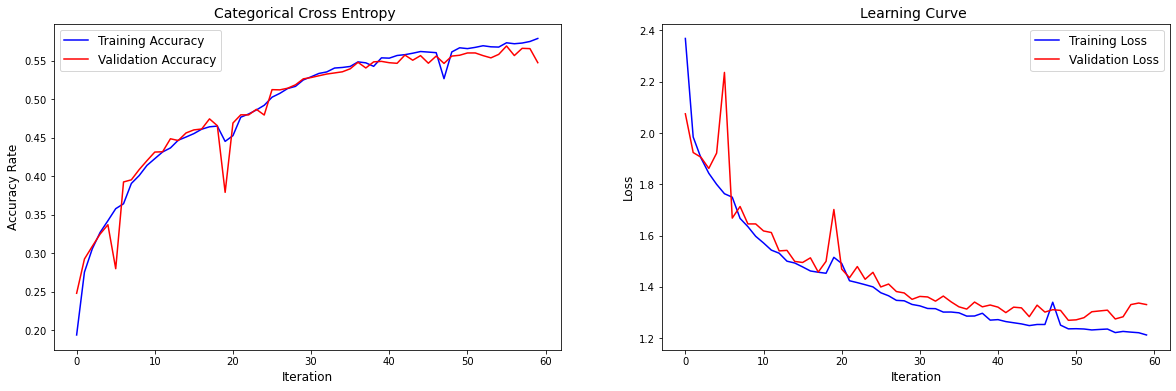

In [9]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history.history['accuracy'],'b', history.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title('Categorical Cross Entropy ',fontsize=14)
ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history.history['loss'], 'b',history.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve ',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

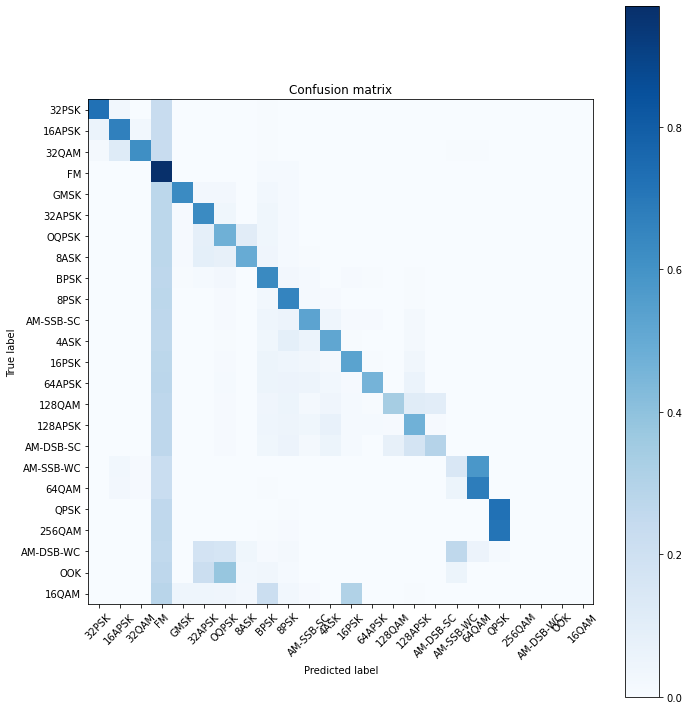

In [10]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot confusion matrix
batch_size = 1024
test_Y_hat = model.predict(X_test, batch_size=3000)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [11]:
for i in range(len(confnorm)):
    print(classes[i],confnorm[i,i])

32PSK 0.725222601314804
16APSK 0.6685255597803126
32QAM 0.6154291384157433
FM 0.969517287456155
GMSK 0.6306254136333554
32APSK 0.6288487282463187
OQPSK 0.4744615892400363
8ASK 0.49588631264023936
BPSK 0.6334986133288512
8PSK 0.654119788219722
AM-SSB-SC 0.5290594685786588
4ASK 0.5162195625257945
16PSK 0.5302174995849245
64APSK 0.4588284871470712
128QAM 0.33711738984191053
128APSK 0.47069689336691856
AM-DSB-SC 0.2926870461070765
AM-SSB-WC 0.14681716325006225
64QAM 0.6809449848769721
QPSK 0.7270682329417646
256QAM 0.0
AM-DSB-WC 0.0
OOK 0.0
16QAM 0.0


In [16]:
model2 = Model.Model(inputs=X_input,outputs=X)
model2.compile(loss='categorical_crossentropy', optimizer='Adam',metrics=['accuracy'])
model2.summary()

Model: "functional_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1024, 2)]    0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 1, 1024, 2)   0           input_2[0][0]                    
__________________________________________________________________________________________________
ReStk1_conv1 (Conv2D)           (None, 32, 1024, 2)  64          reshape_1[0][0]                  
__________________________________________________________________________________________________
ReStk1_conv2 (Conv2D)           (None, 32, 1024, 2)  6176        ReStk1_conv1[0][0]               
_______________________________________________________________________________________

In [17]:
filepath = 'resnet_model_upper.h5'
history2 = model2.fit(X_train_upper,
    Y_train_upper,
    batch_size=1024,
    epochs=100,
    verbose=1,
#     validation_data=(X_test, Y_test),
    validation_split = 0.2,
    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto'),
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='auto')
    ])

Epoch 1/100
 58/520 [==>...........................] - ETA: 2:16 - loss: 1.1416 - accuracy: 0.6017

KeyboardInterrupt: 

# A model can overfit to cross entropy loss without over overfitting to accuracy.

There is a key difference between the two types of loss:
   Accuracy measures whether you get the prediction right
  Cross entropy measures how confident you are about a prediction
For example, if an image of a cat is passed into two models. Model A predicts {cat: 0.9, dog: 0.1} and model B predicts {cat: 0.6, dog: 0.4}. Both model will score the same accuracy, but model A will have a lower loss.
Because of this the model will try to be more and more confident to minimize loss. It works fine in training stage, but in validation stage it will perform poorly in term of loss. For example, for some borderline images, being confident e.g. {cat: 0.9, dog: 0.1} will give higher loss than being uncertain e.g. {cat: 0.6, dog: 0.4}
In short, cross entropy loss measures the calibration of a model. Mis-calibration is a common issue to modern neuronal networks. They tend to be over-confident. On Calibration of Modern Neural Networks talks about it in great details.

NameError: name 'history2' is not defined

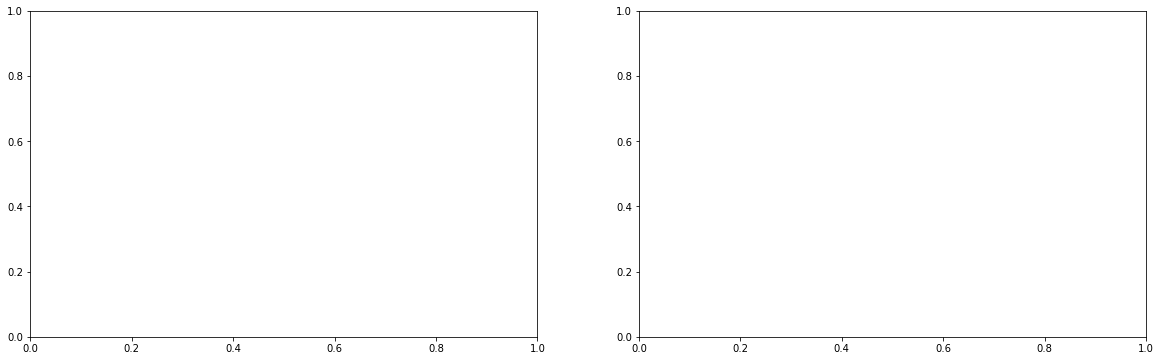

In [18]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2,figsize=(20,6))

ax1.plot(history2.history['accuracy'],'b', history2.history['val_accuracy'], 'r')
ax1.set_ylabel('Accuracy Rate',fontsize=12)
ax1.set_xlabel('Iteration',fontsize=12)
ax1.set_title('Categorical Cross Entropy ',fontsize=14)
ax1.legend(['Training Accuracy','Validation Accuracy'],fontsize=12,loc='best')

ax2.plot(history2.history['loss'], 'b',history2.history['val_loss'],'r')
ax2.set_ylabel('Loss',fontsize=12)
ax2.set_xlabel('Iteration',fontsize=12)
ax2.set_title('Learning Curve ',fontsize=14)
ax2.legend(['Training Loss','Validation Loss'],fontsize=12,loc='best')

# plt.savefig('crosse_results.png')
plt.show()

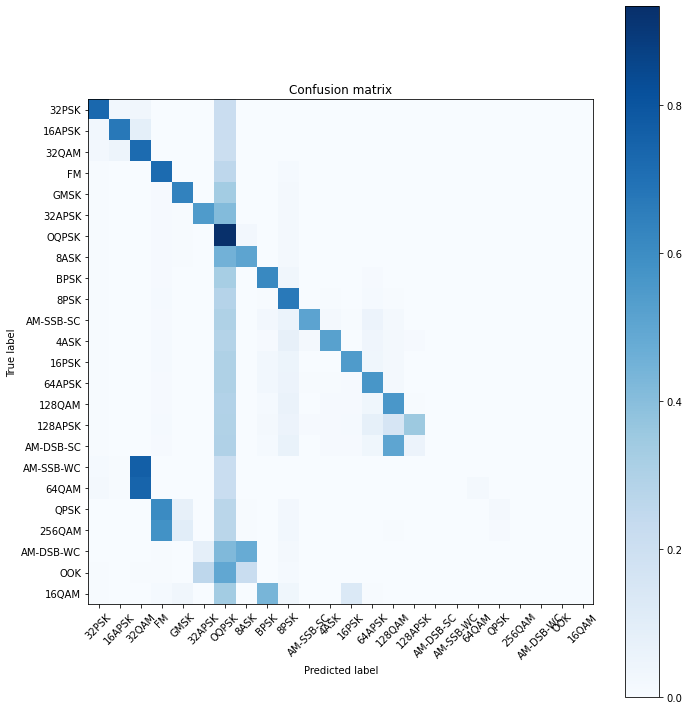

In [19]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=[]):
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Plot confusion matrix
batch_size = 1024
test_Y_hat = model2.predict(X_test, batch_size=3000)
conf = np.zeros([len(classes),len(classes)])
confnorm = np.zeros([len(classes),len(classes)])
for i in range(0,X_test.shape[0]):
    j = list(Y_test[i,:]).index(1)
    k = int(np.argmax(test_Y_hat[i,:]))
    conf[j,k] = conf[j,k] + 1
for i in range(0,len(classes)):
    confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
plot_confusion_matrix(confnorm, labels=classes)

In [21]:
for i in range(len(confnorm)):
    print(classes[i],confnorm[i,i])

32PSK 0.7295498044437048
16APSK 0.6730038022813688
32QAM 0.7214321150983959
FM 0.7211458159345248
GMSK 0.6346790205162144
32APSK 0.5456827309236948
OQPSK 0.9329152570344088
8ASK 0.5030333250228538
BPSK 0.6157660307588873
8PSK 0.6685969556585043
AM-SSB-SC 0.5099114297764656
4ASK 0.5188609162195625
16PSK 0.5448281587248879
64APSK 0.561314791403287
128QAM 0.5606289942818702
128APSK 0.3524769101595298
AM-DSB-SC 0.0
AM-SSB-WC 0.0002489833181176861
64QAM 0.016103981034905582
QPSK 0.018412063650753978
256QAM 0.0
AM-DSB-WC 0.0
OOK 0.0
16QAM 0.0


In [23]:

acc={}
# Z_test = Z[test_idx]
# Z_test = Z_test.reshape((len(Z_test)))
SNRs = np.unique(Z_train)
for snr in SNRs:
    X_test_snr = X_test[Z_test==snr]
    Y_test_snr = Y_test[Z_test==snr]
#     if (snr<=0):      
#         pre_Y_test = model.predict(X_test_snr)
#     else:
#         pre_Y_test = model2.predict(X_test_snr)

    pre_Y_test = model2.predict(X_test_snr)

    conf = np.zeros([len(classes),len(classes)])
    confnorm = np.zeros([len(classes),len(classes)])
    for i in range(0,X_test_snr.shape[0]):    #该信噪比下测试数据量
        j = list(Y_test_snr[i,:]).index(1)   #正确类别下标
        k = int(np.argmax(pre_Y_test[i,:])) #预测类别下标
        conf[j,k] = conf[j,k] + 1
    for i in range(0,len(classes)):
        confnorm[i,:] = conf[i,:] / np.sum(conf[i,:])
   
    plt.figure()
    plot_confusion_matrix(confnorm, labels=classes, title="ConvNet Confusion Matrix (SNR=%d)"%(snr))
    
    cor = np.sum(np.diag(conf))
    ncor = np.sum(conf) - cor
    print ("Overall Accuracy %s: "%snr, cor / (cor+ncor))
    acc[snr] = 1.0*cor/(cor+ncor)

NameError: name 'Z_test' is not defined

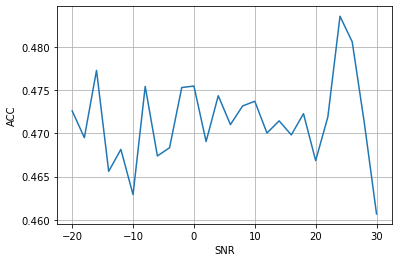

In [31]:

plt.plot(acc.keys(),acc.values())
plt.ylabel('ACC')
plt.xlabel('SNR')
plt.grid(True)
plt.show()

In [ ]:
X_test=X[train_idx]
